In [1]:
%matplotlib inline
# %load outlier_removal_regression.py
#!/usr/bin/python3

import random
import numpy
import matplotlib.pyplot as plt
import joblib
import sys
import os

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = joblib.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = joblib.load( open("practice_outliers_net_worths.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)


In [2]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

print("Slope of regression: ", reg.coef_)
print("Accuracy of regression on test data: {}".format(reg.score(ages_test, net_worths_test)))


Slope of regression:  [[5.07793064]]
Accuracy of regression on test data: 0.8782624703664671


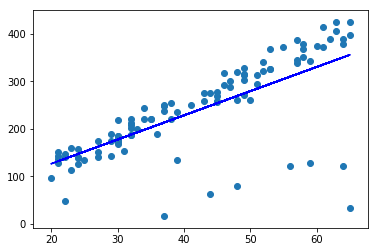

In [3]:
# Plotting Data
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


81


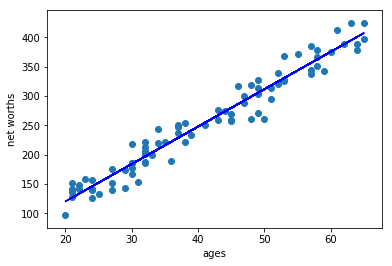

In [4]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
    print(len(cleaned_data))
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")




### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("You don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")




In [5]:
print("New Score: {}".format(reg.score(ages_test, net_worths_test)))

New Score: 0.983189455395532


In [ ]:
# def outlierCleaner(predictions, ages, net_worths):
#     """
#         Clean away the 10% of points that have the largest
#         residual errors (difference between the prediction
#         and the actual net worth).

#         Return a list of tuples named cleaned_data where 
#         each tuple is of the form (age, net_worth, error).
#     """
#     # Remove 10% of elements
#     how_many_to_remove = len(predictions) // 10
#     print("{} items present. Remove 10pct i.e. {}".format(len(predictions), how_many_to_remove))
    
#     cleaned_data = []

#     residual_errors_list = [abs(p - n) for p, n in zip(predictions, net_worths)]
#     print("***** Residual Errors: ", residual_errors_list)
#     all_errors_list = [(r, a, n) for r, a, n in zip(residual_errors_list, ages, net_worths)]
#     print("***** All Errors: ", all_errors_list)

#     for i in range(how_many_to_remove):
#         all_errors_list.remove(max(all_errors_list))
#     print("***** {} elements removed to get {}".format(how_many_to_remove, all_errors_list))
    
#     cleaned_data = [(a, n, r) for r, a, n in all_errors_list]
#     print(cleaned_data)

#     return cleaned_data

# outlierCleaner([101.52, 204.55, 306.52, 420.53, 550.633, 620.3, 752.5, 852.9, 5555, 2000], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [101, 202, 303, 404, 505, 606, 707, 808, 909, 1010])